<a href="https://colab.research.google.com/github/viniciusacosta/Sentiment_Analysis/blob/main/Amazon_Reviews_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problem overview**

**Business Problem:**

One of the most important problems in e-commerce is the correct calculation of the points given to the products after sales. The solution to this problem means providing greater customer satisfaction for the e-commerce site, prominence of the product for the sellers and a seamless shopping experience for the buyers. Another problem is the correct ordering of the comments given to the products. The prominence of misleading comments will cause both financial loss and loss of customers. In the solution of these 2 basic problems, while the e-commerce site and the sellers will increase their sales, the customers will complete the purchasing journey without any problems.


**Dataset Story:**

This dataset containing Amazon Product Data includes product categories and various metadata. The product with the most comments in the electronics category has user ratings and comments.


Source: https://www.kaggle.com/datasets/tarkkaanko/amazon

# **2. Carregando Dados**

## **2.1 Importing library**


In [ ]:
# Importing libraries for datasets manipulation and exploration
import pandas as pd
import numpy as np

# Importing libraries for graphs plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing Natural Language Toolkit
import nltk

# Importing libraries to hide Future Warnings
import warnings
warnings.filterwarnings('ignore')

# Import other usefull libraries
from tqdm.notebook import tqdm
import time
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2.2 Loading dataset**

In [ ]:
# Loading dataframe
df = pd.read_csv('https://raw.githubusercontent.com/viniciusacosta/Sentiment_Analysis/main/amazon_reviews.csv')

# Displaying the first lines of the DataFrame
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


# **3. Data preparation and overview**

In [ ]:
# Creating function to get a summary of the dataset
def features_summary(dataframe):

# Creating dictionary to store information
  dict_info = {""             : [], 
               "dtypes"       : [],  
               "Unique Values": [],
               "NUniques"     : [],  
               "NaN values"   : [],
               "Mean"         : [],
               "Min"          : [],
               "Max"          : [],
              }

  # Assigning feature information to the DataFrame
  for col in dataframe.columns:

    # Feature name
    dict_info[''].append(col)

    # Feature dtype
    dict_info['dtypes'].append(dataframe[col].dtypes)

    # Unique values ​​in the feature
    dict_info["Unique Values"].append(dataframe[col].unique())

    # Number of unique values ​​in the feature
    dict_info["NUniques"].append(dataframe[col].nunique())

    # Getting the average, minimum value and maximum value of the feature
    if (dataframe[col].dtypes == object) or (dataframe[col].nunique() == 2):
      dict_info["Mean"].append('-')
      dict_info["Min"].append(dataframe[col].unique()[0])                               
      dict_info["Max"].append(dataframe[col].unique()[1])

    else:
      dict_info["Mean"].append(dataframe[col].mean().round(2))
      dict_info["Min"].append(dataframe[col].min())                               
      dict_info["Max"].append(dataframe[col].max())

    # Checking the number of existing NaNs inside the feature
    dict_info["NaN values"].append(dataframe[col].isna().sum())

  # Transforming dictionary into dataframe
  info = pd.DataFrame.from_dict(data = dict_info)

  # Defining the index
  info.set_index("", inplace=True)

  # Displaying information
  return info

In [ ]:
# Checking dataset dimensions
df.shape

(4915, 12)

Was verified the existence of **13 features**, and **4915 rows** within the dataset

In [ ]:
# Displaying information
features_summary(df)

,dtypes,Unique Values,NUniques,NaN values,Mean,Min,Max
,,,,,,,
Unnamed: 0,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4915,0,2457.0,0,4914
reviewerName,object,"[nan, 0mie, 1K3, 1m2, 2&amp;1/2Men, 2Cents!, 2...",4594,1,-,NaN,0mie
overall,float64,"[4.0, 5.0, 3.0, 1.0, 2.0]",5,0,4.59,1.0,5.0
reviewText,object,"[No issues., Purchased this for my device, it ...",4912,1,-,No issues.,"Purchased this for my device, it worked as adv..."
reviewTime,object,"[2014-07-23, 2013-10-25, 2012-12-23, 2013-11-2...",690,0,-,2014-07-23,2013-10-25
day_diff,int64,"[138, 409, 715, 382, 513, 588, 415, 62, 259, 3...",690,0,437.37,1,1064
helpful_yes,int64,"[0, 1, 3, 15, 4, 5, 2, 38, 422, 6, 7, 60, 1952...",23,0,1.31,0,1952
helpful_no,int64,"[0, 1, 6, 2, 3, 10, 73, 8, 4, 68, 110, 183, 77...",17,0,0.21,0,183
total_vote,int64,"[0, 1, 2, 3, 21, 4, 5, 48, 495, 7, 6, 68, 2020...",26,0,1.52,0,2020


In [ ]:
# Transforming data type of "reviewText" to string
df = df.astype({"reviewText": str})

# Renaming "Unnamed: 0" column
df.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

# Removing columns that will not be used in the analysis
df.drop(columns=['helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'], inplace=True)

#**4. Exploratory Data Analysis**

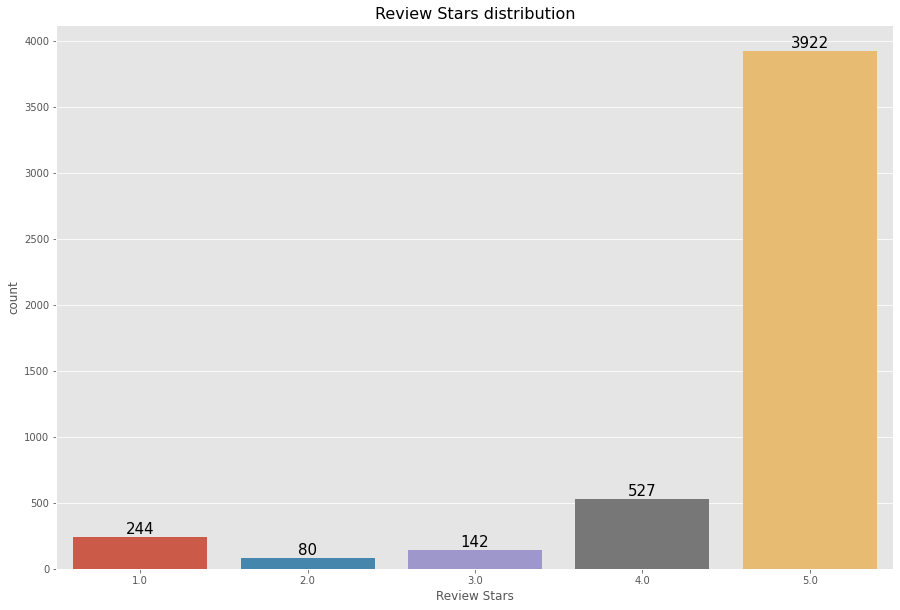

In [ ]:
# Plotting the Review Score ("overall") distribution
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(df['overall'])

ax.bar_label(ax.containers[0], fontsize=15)
ax.set_title('Review Stars distribution', fontsize=16, loc='center')
ax.set_xlabel('Review Stars')

plt.legend([],[], frameon=False)
plt.show()

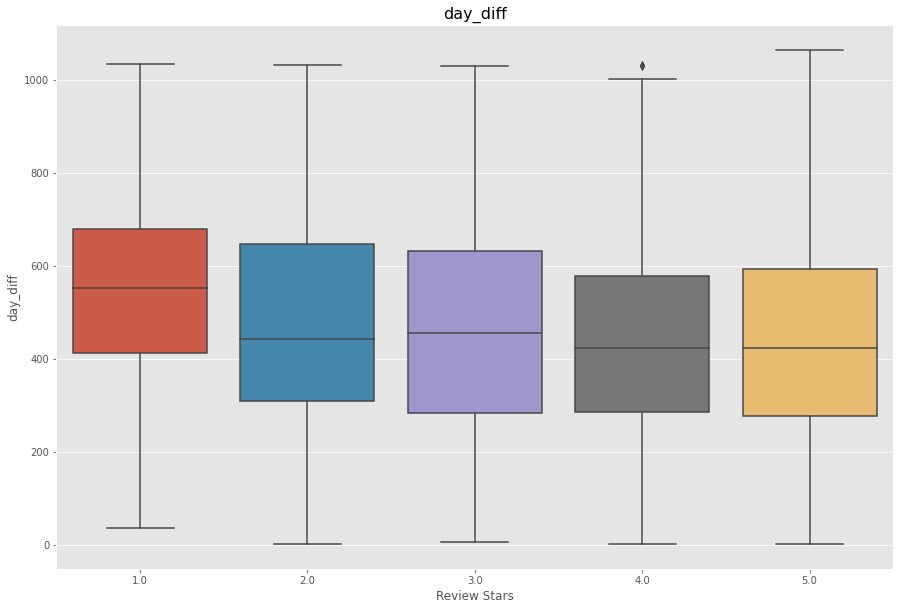

In [ ]:
# Plotting the day_diff distribution based on "Review Stars"
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = 'overall', y = 'day_diff', data = df)

ax.set_title('day_diff', fontsize=16, loc='center')
ax.set_xlabel('Review Stars')
plt.show()

# **5. NLP models**

## **5.1 Importing models**

### **VADER (Valence Aware Dictionary and sEntiment Reasoner)**

VADER is a lexicon rule-based sentiment analysis tool that not only tells if a word as either positive or negative but also give scores to the words, informing us how positive or negative a text is. Even tough it's a prety popular scoring method, it has some cons. 

This uses a "bag of words" approach:
- Stop words are removed
- Each word is scored and combined to a total score, which can influence the real sentiment of the text

### **RoBERTa (Robustly Optimized BERT Pretraining Approach)**

"The RoBERTa model was proposed in RoBERTa: A Robustly Optimized BERT Pretraining Approach by Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi Chen, Omer Levy, Mike Lewis, Luke Zettlemoyer, Veselin Stoyanov.

It builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates."

Diferently from the VADER scoring which consider the words independently, RoBERTa model is way more complex. It's a model trained in a large corpus of data from Twitter, and takes consideration the context in which the words are being presented.

In [ ]:
# Importing Vader scoring
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Importing RoBERTa
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# Downloading model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

## **5.2 Aplying models**

In [ ]:
# Defining a function to apply the RoBERTa model
def polarity_scores_roberta(text): 
  encoded_text = tokenizer(text, return_tensors='pt')  
  output = model(**encoded_text)  
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = { 
      'roberta_neg' : scores[0],  
      'roberta_neu' : scores[1],  
      'roberta_pos' : scores[2] 
  }

  return scores_dict

In [ ]:
# Applying the models in the reviews texts
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviewText']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        total_results = {**vader_result_rename, **roberta_result}
        results[myid] = total_results
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/4915 [00:00<?, ?it/s]

Broke for id 76
Broke for id 123
Broke for id 722
Broke for id 1380
Broke for id 2031
Broke for id 2799
Broke for id 2881
Broke for id 2934
Broke for id 2993
Broke for id 3345
Broke for id 3449
Broke for id 3757
Broke for id 3967
Broke for id 4176
Broke for id 4212
Broke for id 4423
Broke for id 4587
Broke for id 4596


In [ ]:
# Creating dataframe with the results
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviewerName,overall,reviewText,reviewTime,day_diff
0,0,0.688,0.312,0.000,-0.2960,0.074959,0.589215,0.335825,NaN,4.0,No issues.,2014-07-23,138
1,1,0.075,0.925,0.000,-0.2960,0.007265,0.095529,0.897206,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409
2,2,0.077,0.923,0.000,-0.3089,0.423757,0.448311,0.127933,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715
3,3,0.000,0.909,0.091,0.7081,0.002447,0.019229,0.978324,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382
4,4,0.038,0.835,0.127,0.7087,0.003552,0.067459,0.928989,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,4910,0.091,0.817,0.092,0.0018,0.941034,0.052561,0.006405,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503
4893,4911,0.000,0.939,0.061,0.1761,0.001014,0.037862,0.961125,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473
4894,4912,0.000,0.828,0.172,0.8588,0.001345,0.015444,0.983211,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252
4895,4913,0.000,0.802,0.198,0.4939,0.006550,0.106314,0.887136,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448


# **6. Comparing Models**

In [ ]:
# Creating a function to plot Box Plot graphs
def plotBox(numerical_features, y_target, dataframe):
  
    # Number of columns
    number_of_columns = 3

    # Number of rows
    number_of_rows = math.ceil(len(numerical_features)/2)

    # Creating a figure
    fig = plt.figure(figsize=(30, 8 * number_of_rows))

    # Loop to create the graphs of the chosen characteristics of the graphs
    for index, col in enumerate(numerical_features, 1):

        # Creating subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.boxplot(x = y_target, y = col, data = dataframe)

        # Defining title
        ax.set_title(col, fontsize=16, loc='center')

In [ ]:
# Creating a function to plot bar graphs
def plotBar(categorical_features, y_target, dataframe):  

    # Number of columns
    number_of_columns = 3

    # Number of rows
    number_of_rows = math.ceil(len(categorical_features)/2)

    # Creating a figure
    fig = plt.figure(figsize=(30, 8 * number_of_rows))

    # Loop to create the graphs of the chosen characteristics of the graphs
    for index, col in enumerate(categorical_features, 1):

        # Creating subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.barplot(data=dataframe, x=y_target, y=col)

        # Defining title
        ax.set_title(col, fontsize=16, loc='center')

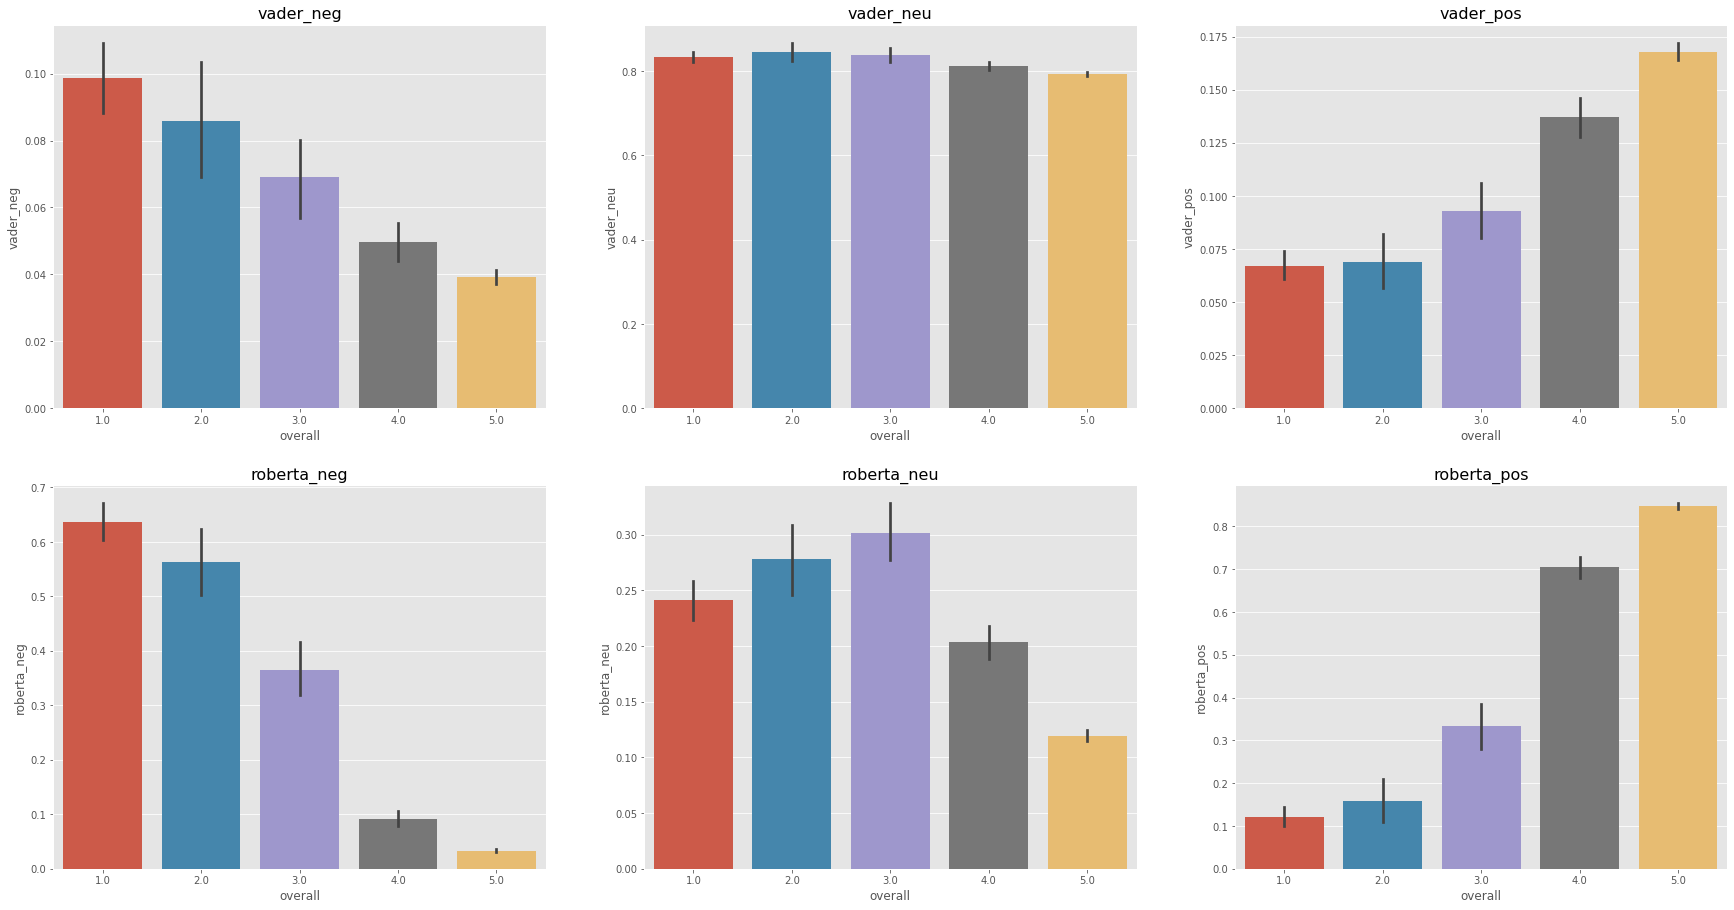

In [ ]:
# Plotting barplot graphs
plotBar(['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], 'overall', results_df)

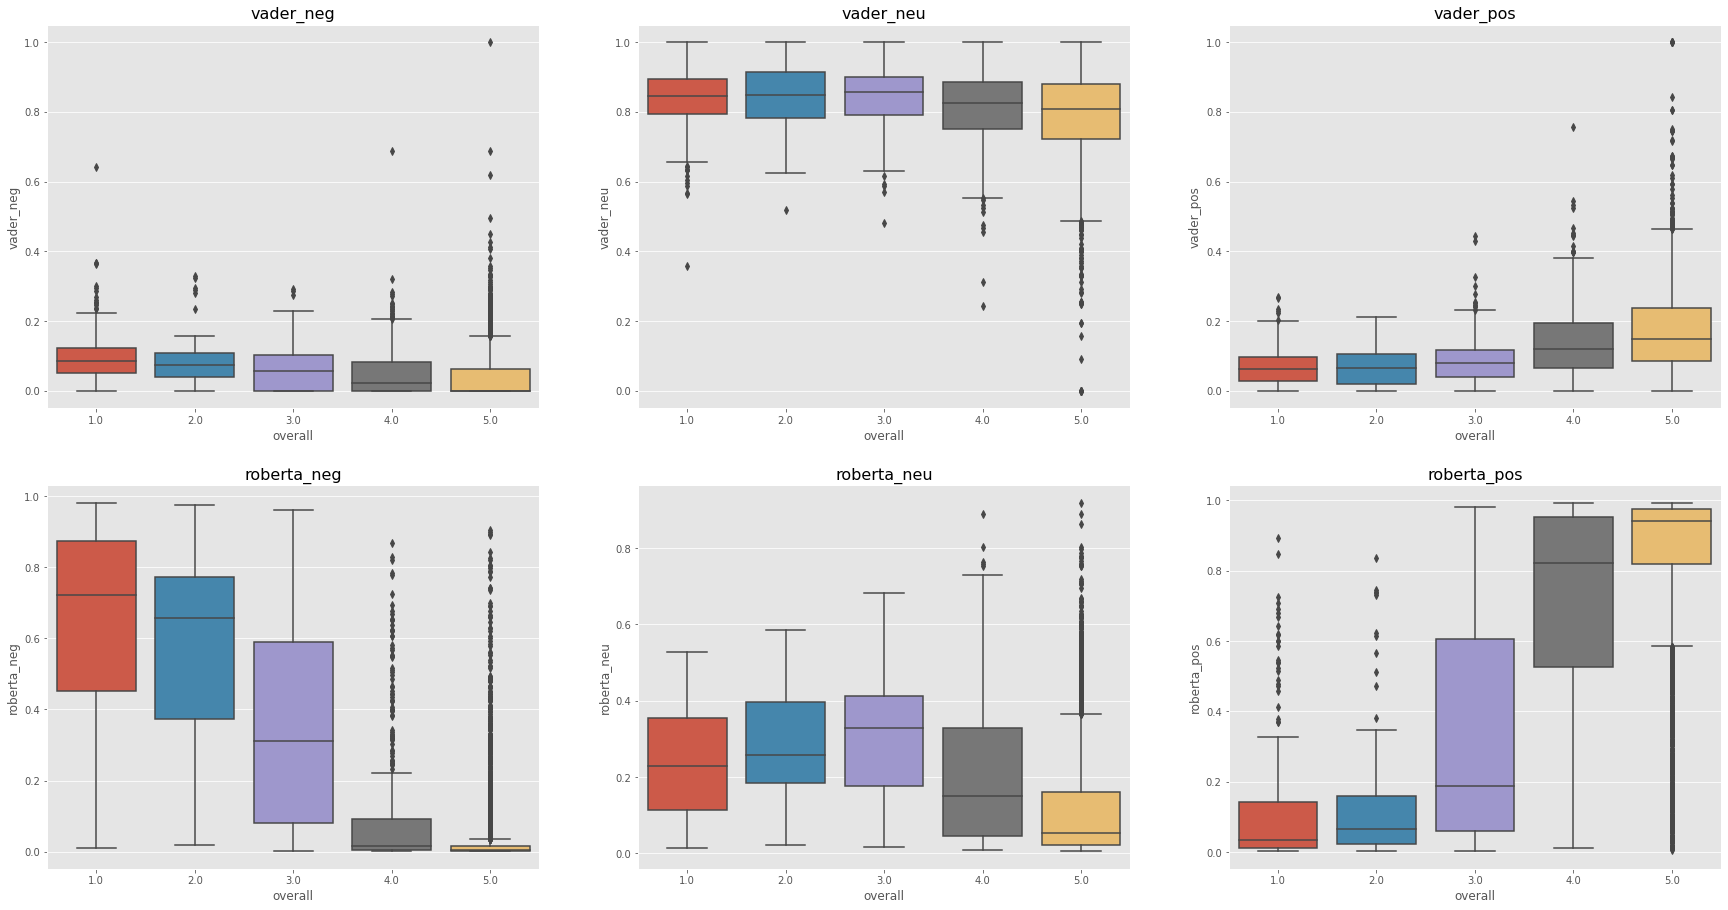

In [ ]:
# Plotting boxplot graphs
plotBox(['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], 'overall', results_df)

### **VADER (Valence Aware Dictionary and sEntiment Reasoner)**

**Barplot**

The graphs confirms what we were expecting to see, where the score of the text follows the 'Review Stars' ("overall"). The negative one ('vader_neg') presents high values in lower 'Review Stars', and 'vader_pos' (responsible for represent positive sentiments) showing higher scores next to reviews of 4 and 5 stars.

**Boxplot**

The distribution of values are really similar, specially on the **"vader_neg"** which does not indicate a good evaluation of sentiment. This is propably happening because of bad interpretation of words.

### **RoBERTa (Robustly Optimized BERT Pretraining Approach)**

**Barplot**

Just like the Vader results, the sentiment score follows the 'Review Stars', although, here we can see a much clearer diference between the ratings, specially in **roberta_neg** and **roberta_pos** which represent the negative and positve score respectively.

**Boxplot**

Here lies the biggest diference between the two models. The RoBERTa model presents a way better distribuition in it's scores, while following it's barplot values. Which can probably indicate a better understanding of the reviews sentiment.

# **7. Conclusion**

### Since the Vader model is a bit less confident in his predictions, and RoBERTa separates the negative, neutral and positive scores with much better clarity. With the results presented and the factor that **RoBERTa model** takes consideration the context of the full text, it's probably the better way to sentiment score the reviews.